In [ ]:
"""rn_covid_29_07.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1qi-i9qZCeHEO-d5ztmyjUN_8snjwd_9h
"""

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import os
import re
import cv2
from google.colab import drive
import zipfile
import imageio
import pickle
import tqdm
import keras
import tensorflow_addons as tfa

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/2020/TREINO.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("/content/dataset/treino")
zip_object.close()

In [ ]:
path = "/content/drive/My Drive/2020/teste.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("/content/dataset")
zip_object.close()

In [ ]:
path_train_normais = '/content/dataset/treino/NORMAIS/'
path_train_covid = '/content/dataset/treino/COVID/'
path_train_nao_covid = '/content/dataset/treino/N╟O COVID/'

path_teste_randomizados = '/content/dataset/TESTE_randomizados/'
path_teste_randomizados_convertidos = '/content/dataset/teste_convertido/'

path_treino_convertido_normais = '/content/dataset/treino_convertido/normais/'
path_treino_convertido_covid = '/content/dataset/treino_convertido/covid/'
path_treino_convertido_naocovid = '/content/dataset/treino_convertido/naocovid/'

path_dataset_treino_convertido = '/content/dataset/treino_convertido'

In [ ]:
!mkdir /content/dataset/treino_convertido
!mkdir /content/dataset/treino_convertido/covid
!mkdir /content/dataset/treino_convertido/naocovid
!mkdir /content/dataset/treino_convertido/normais

!mkdir /content/dataset/teste_convertido

In [ ]:
def imageConvert(path, image_name, output_path_convertido):
        try:
            image_path = path+image_name

            image = cv2.imread(image_path)


            thresh = cv2.resize(image, (512, 512))



            cv2.imwrite(output_path_convertido+image_name[0:-4]+'_new.png', thresh)
        except:
            pass

In [ ]:
for i in os.listdir(path_train_normais):
   imageConvert(path_train_normais, i, path_treino_convertido_normais)

In [ ]:
for i in os.listdir(path_train_covid):
   imageConvert(path_train_covid, i, path_treino_convertido_covid)

In [ ]:
for i in os.listdir(path_train_nao_covid):
   imageConvert(path_train_nao_covid, i, path_treino_convertido_naocovid)

In [ ]:
###################################################################################

In [ ]:
for i in os.listdir(path_teste_randomizados):
   imageConvert(path_teste_randomizados, i, path_teste_randomizados_convertidos)

In [ ]:
###################################################################################

<Figure size 720x720 with 0 Axes>

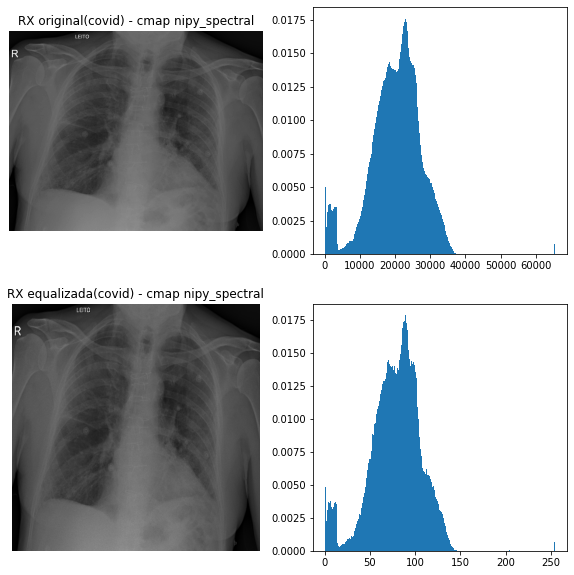

In [ ]:
image_path_covid_original = '/content/dataset/treino/COVID/covid (102).png'
image_path_covid_convertida = '/content/dataset/treino_convertido/covid/covid (102)_new.png'

img_covertida = imageio.imread(image_path_covid_convertida)
img_original = imageio.imread(image_path_covid_original)

plt.figure(figsize=(10,10))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))  # Lines and cols

cache = [(img_original, 'RX original(covid) - cmap nipy_spectral'), (img_covertida, 'RX equalizada(covid) - cmap nipy_spectral')]

for indice, image in zip(range(0, 2), cache):
    ax[indice, 0].imshow(image[0], cmap='gray')

    ax[indice, 0].set_title(image[1])

    ax[indice, 0].axis('off')

    weights = np.ones(image[0].ravel().shape) / float(image[0].size)

    ax[indice, 1].hist(image[0].flatten(), bins=256, weights=weights)

plt.savefig('/content/dataset/RX Covid.png', dpi=250)

plt.show()

<Figure size 720x720 with 0 Axes>

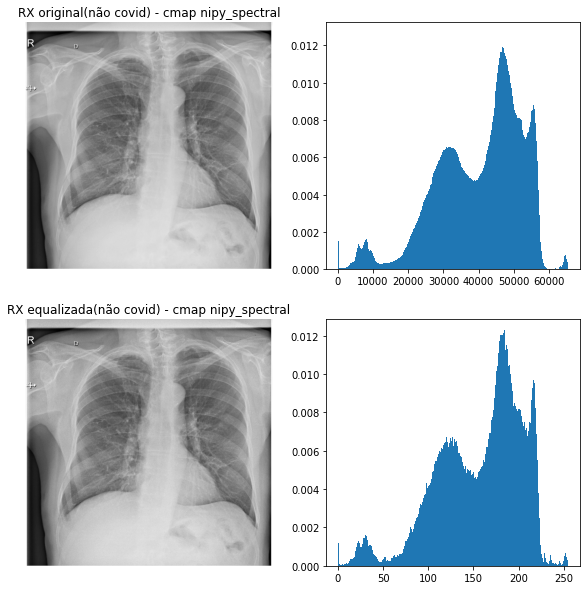

In [ ]:
image_path_naocovid_original = '/content/dataset/treino/N╟O COVID/alterado (104).png'
image_path_naocovid_convertida = '/content/dataset/treino_convertido/naocovid/alterado (104)_new.png'

img_covertida = imageio.imread(image_path_naocovid_convertida)
img_original = imageio.imread(image_path_naocovid_original)

plt.figure(figsize=(10,10))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))  # Lines and cols

cache = [(img_original, 'RX original(não covid) - cmap nipy_spectral'), (img_covertida, 'RX equalizada(não covid) - cmap nipy_spectral')]

for indice, image in zip(range(0, 2), cache):
    ax[indice, 0].imshow(image[0], cmap='gray')

    ax[indice, 0].set_title(image[1])

    ax[indice, 0].axis('off')

    weights = np.ones(image[0].ravel().shape) / float(image[0].size)

    ax[indice, 1].hist(image[0].flatten(), bins=256, weights=weights)

plt.savefig('/content/dataset/RX Nao Covid.png', dpi=250)

plt.show()

<Figure size 720x720 with 0 Axes>

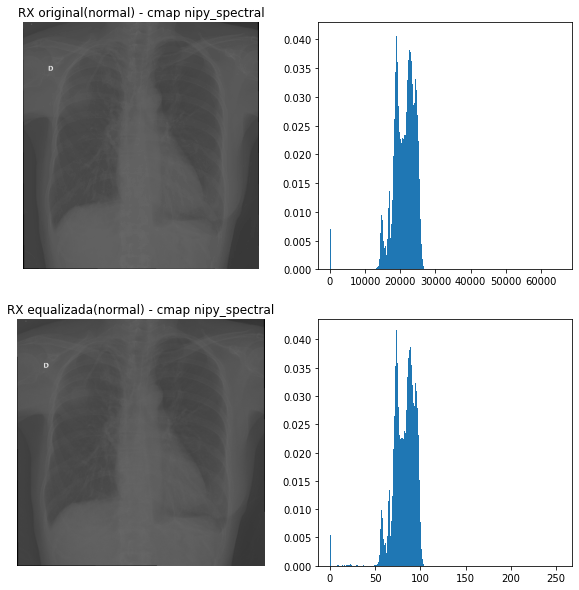

In [ ]:
image_path_normais_original = '/content/dataset/treino/NORMAIS/normal (105).png'
image_path_normais_convertida = '/content/dataset/treino_convertido/normais/normal (105)_new.png'

img_covertida = imageio.imread(image_path_normais_convertida)
img_original = imageio.imread(image_path_normais_original)

plt.figure(figsize=(10,10))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))  # Lines and cols

cache = [(img_original, 'RX original(normal) - cmap nipy_spectral'), (img_covertida, 'RX equalizada(normal) - cmap nipy_spectral')]

for indice, image in zip(range(0, 2), cache):
    ax[indice, 0].imshow(image[0], cmap='gray')

    ax[indice, 0].set_title(image[1])

    ax[indice, 0].axis('off')

    weights = np.ones(image[0].ravel().shape) / float(image[0].size)

    ax[indice, 1].hist(image[0].flatten(), bins=256, weights=weights)

plt.savefig('/content/dataset/RX Normal.png', dpi=250)

plt.show()

In [ ]:
def especificidade(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

In [ ]:
list_metrics = ['accuracy', recall,
                especificidade, tf.keras.metrics.AUC()]

list_loss = ['categorical_crossentropy']
otimizador = 'adam'

In [ ]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
csv_logger = CSVLogger('/content/dataset/training_29_07_2020.log', separator=',', append=False)
es = EarlyStopping(monitor = 'recall', min_delta = 1e-10, patience = 250,
                   mode='auto', verbose = 0)
rlr = ReduceLROnPlateau(monitor = 'recall', factor = 0.1, patience = 1,
                        mode='auto',  min_lr=0, verbose = 0)
mcp = ModelCheckpoint(filepath = '/content/dataset/pesos_train_29_07_2020.h5', monitor = 'recall',
                      save_best_only = True, verbose = 0, mode='auto', period=1)

tqdmn = tfa.callbacks.TQDMProgressBar()
baselogger = keras.callbacks.BaseLogger()

In [ ]:
classificador.compile(loss = list_loss, optimizer = otimizador, metrics = list_metrics)

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255)


base_treinamento = gerador_treinamento.flow_from_directory('/content/dataset/treino',
                                                           target_size = (64, 64),
                                                           batch_size = 1,
                                                           class_mode = 'categorical')

Found 592 images belonging to 3 classes.


In [ ]:
base_treinamento.class_indices

{'COVID': 0, 'NORMAIS': 1, 'N╟O COVID': 2}

In [ ]:
history = classificador.fit(base_treinamento, steps_per_epoch = base_treinamento.n,
                            epochs = 100, verbose = 0,
                            callbacks = [tqdmn, mcp, csv_logger, baselogger],
                            shuffle=True)

Epoch 1/100



Epoch 2/100



Epoch 3/100



Epoch 4/100



Epoch 5/100



Epoch 6/100



Epoch 7/100



Epoch 8/100



Epoch 9/100



Epoch 10/100



Epoch 11/100



Epoch 12/100



Epoch 13/100



Epoch 14/100



Epoch 15/100



Epoch 16/100



Epoch 17/100



Epoch 18/100



Epoch 19/100



Epoch 20/100



Epoch 21/100



Epoch 22/100



Epoch 23/100



Epoch 24/100



Epoch 25/100



Epoch 26/100



Epoch 27/100



Epoch 28/100



Epoch 29/100



Epoch 30/100



Epoch 31/100



Epoch 32/100



Epoch 33/100



Epoch 34/100



Epoch 35/100



Epoch 36/100



Epoch 37/100



Epoch 38/100



Epoch 39/100



Epoch 40/100



Epoch 41/100



Epoch 42/100



Epoch 43/100



Epoch 44/100



Epoch 45/100



Epoch 46/100



Epoch 47/100



Epoch 48/100



Epoch 49/100



Epoch 50/100



Epoch 51/100



Epoch 52/100



Epoch 53/100



Epoch 54/100



Epoch 55/100



Epoch 56/100



Epoch 57/100



Epoch 58/100



Epoch 59/100



Epoch 60/100



Epoch 61/100



Epoch 62/100



Epoch 63/100



Epoch 64/100



Epoch 65/100



Epoch 66/100



Epoch 67/100



Epoch 68/100



Epoch 69/100



Epoch 70/100



Epoch 71/100



Epoch 72/100



Epoch 73/100



Epoch 74/100



Epoch 75/100



Epoch 76/100



Epoch 77/100



Epoch 78/100



Epoch 79/100



Epoch 80/100



Epoch 81/100



Epoch 82/100



Epoch 83/100



Epoch 84/100



Epoch 85/100



Epoch 86/100



Epoch 87/100



Epoch 88/100



Epoch 89/100



Epoch 90/100



Epoch 91/100



Epoch 92/100



Epoch 93/100



Epoch 94/100



Epoch 95/100



Epoch 96/100



Epoch 97/100



Epoch 98/100



Epoch 99/100



Epoch 100/100


In [ ]:
previsao_mult = []
previsao_bin = []
classe_mult = []
classe_bin = []
df_train = pd.DataFrame(columns=['nome_imagem','classe','classe_pred', 'prob'])

In [ ]:
def insert(df, row):
    insert_loc = df.index.max()

    if np.isnan(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

In [ ]:
for i in os.listdir(path_treino_convertido_naocovid):
    if re.search('\\.db', i, re.IGNORECASE):
        continue
    else:
        imagem_teste = image.load_img(path_treino_convertido_naocovid+i,
                              target_size = (64,64))
        imagem_teste = image.img_to_array(imagem_teste)
        imagem_teste /= 255
        imagem_teste = np.expand_dims(imagem_teste, axis = 0)

        pred = classificador.predict(imagem_teste)
        indice = np.argmax(pred)

        if indice == 0:
            previsao_mult.append(1)
            previsao_bin.append(1)
            insert(df_train, [i,0,1,pred[0][0]])
        else:
            if indice == 1:
              previsao_mult.append(0)
            else:
              previsao_mult.append(2)

            previsao_bin.append(0)
            insert(df_train, [i,0,0,pred[0][0]])

        classe_mult.append(0)
        classe_bin.append(0)


In [ ]:
for i in os.listdir(path_treino_convertido_normais):
    if re.search('\\.db', i, re.IGNORECASE):
        continue
    else:
        imagem_teste = image.load_img(path_treino_convertido_normais+i,
                              target_size = (64,64))
        imagem_teste = image.img_to_array(imagem_teste)
        imagem_teste /= 255
        imagem_teste = np.expand_dims(imagem_teste, axis = 0)

        pred = classificador.predict(imagem_teste)
        indice = np.argmax(pred)

        if indice == 0:
            previsao_mult.append(1)
            previsao_bin.append(1)
            insert(df_train, [i,0,1,pred[0][0]])
        else:
            if indice == 1:
              previsao_mult.append(0)
            else:
              previsao_mult.append(2)

            previsao_bin.append(0)
            insert(df_train, [i,0,0,pred[0][0]])

        classe_mult.append(2)
        classe_bin.append(0)

In [ ]:
for i in os.listdir(path_treino_convertido_covid):
    if re.search('\\.db', i, re.IGNORECASE):
        continue
    else:
        imagem_teste = image.load_img(path_treino_convertido_covid+i,
                              target_size = (64,64))
        imagem_teste = image.img_to_array(imagem_teste)
        imagem_teste /= 255
        imagem_teste = np.expand_dims(imagem_teste, axis = 0)

        pred = classificador.predict(imagem_teste)
        indice = np.argmax(pred)

        if indice == 0:
            previsao_mult.append(1)
            previsao_bin.append(1)
            insert(df_train, [i,1,1,pred[0][0]])
        else:
            if indice == 1:
              previsao_mult.append(0)
            else:
              previsao_mult.append(2)

            previsao_bin.append(0)
            insert(df_train, [i,1,0,pred[0][0]])

        classe_mult.append(1)
        classe_bin.append(1)

In [ ]:
df_train.to_csv('/content/dataset/arq_train_28_07.csv',sep=';', index=None)

In [ ]:
#Matriz de confusão multiclasse

In [ ]:
cm_mult = confusion_matrix(classe_mult, previsao_mult)

In [ ]:
print(cm_mult)

[[247  54   7]
 [  2  71   2]
 [  9  80 122]]


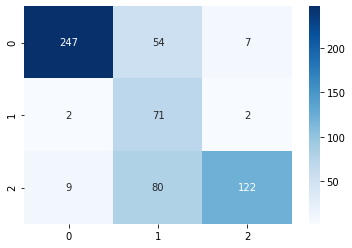

In [ ]:
sns.heatmap(cm_mult, annot=True,
            fmt='.0f', cmap='Blues')
plt.show()

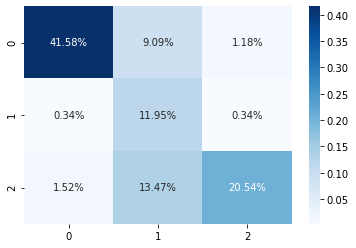

In [ ]:
sns.heatmap(cm_mult/np.sum(cm_mult), annot=True,
            fmt='.2%', cmap='Blues')
plt.show()

In [ ]:
#Matriz de confusão binária

In [ ]:
cm_bin = confusion_matrix(classe_bin, previsao_bin)

In [ ]:
print(cm_bin)

[[385 134]
 [  4  71]]


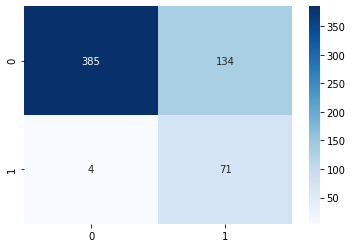

In [ ]:
sns.heatmap(cm_bin, annot=True,
            fmt='.0f', cmap='Blues')
plt.show()

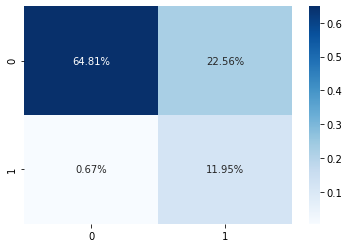

In [ ]:
sns.heatmap(cm_bin/np.sum(cm_bin), annot=True,
            fmt='.2%', cmap='Blues')
plt.show()

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


auc = roc_auc_score(classe_bin, previsao_bin)
print('AUC: %.2f' % auc)

AUC: 0.84


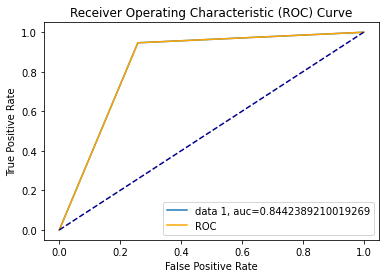

In [ ]:
fpr, tpr, thresholds = roc_curve(classe_bin, previsao_bin)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.savefig('/content/dataset/curva ROC.png', dpi=250)
plot_roc_curve(fpr, tpr)

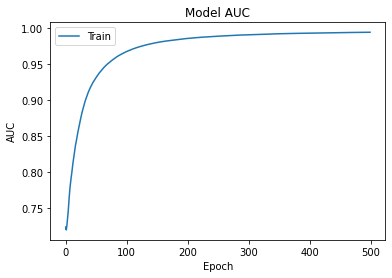

In [ ]:
plt.plot(history.history['auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/dataset/AUC.png', dpi=250)
plt.show()

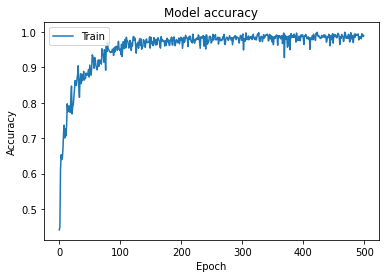

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/dataset/accuracy.png', dpi=250)
plt.show()

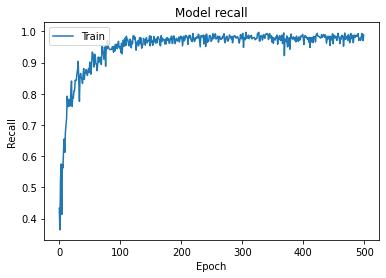

In [ ]:
plt.plot(history.history['recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/dataset/recall.png', dpi=250)
plt.show()

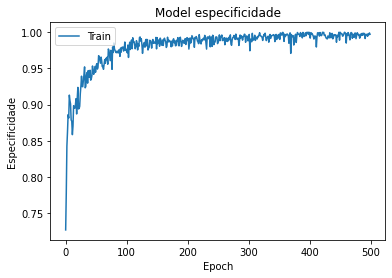

In [ ]:
plt.plot(history.history['especificidade'])
plt.title('Model especificidade')
plt.ylabel('Especificidade')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/dataset/especificidade.png', dpi=250)
plt.show()

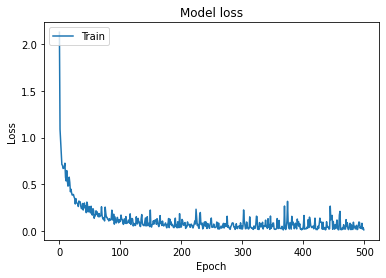

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/dataset/loss.png', dpi=250)
plt.show()

In [ ]:
df_teste = pd.DataFrame(columns=['id_exame','covid','prob'])

In [ ]:
for i in os.listdir(path_teste_randomizados_convertidos):
    if re.search('\\.db', i, re.IGNORECASE):
        continue
    else:
        imagem_teste = image.load_img(path_teste_randomizados_convertidos+i,
                              target_size = (64,64))
        imagem_teste = image.img_to_array(imagem_teste)
        imagem_teste /= 255
        imagem_teste = np.expand_dims(imagem_teste, axis = 0)

        pred = classificador.predict(imagem_teste)
        indice = np.argmax(pred)

        if indice == 0:
            insert(df_teste,[i[0:-8],1,pred[0][0]])

        else:
            insert(df_teste,[i[0:-8],0,pred[0][0]])


In [ ]:
df_teste.columns

Index(['id_exame', 'covid', 'prob'], dtype='object')

In [ ]:
df_teste.head()

,id_exame,covid,prob
0,d1f1172b2e180a68f81653e2fc624eea74a49dadb6d731...,1,0.999983
1,ad614dc621e384ca493ae54eb6fe7fc9fefa96e0c400e9...,1,1.000000
2,10fcc10e82cfde313460a22defd40e6be9dc62014382b9...,1,1.000000
3,6343fab53e8531f03593fc706c3ed53969a2f5dccfb81f...,0,0.000000
4,e9403ee3c9b2f3a39a1bfbac5840d01584899057aa9919...,0,0.000000


In [ ]:
df_teste.tail()

,id_exame,covid,prob
195,eec6a5c37bfa96c4db2ae8ed2647e238d6dc67d8e8c100...,0,0.000000e+00
196,ba44f479bac6f8ac3ab89a8240e2d9fbf5be56bb0eb96b...,0,5.089441e-08
197,eabb4901ac9c5de978c0c1109b97b020ccc9bbaa404b8e...,1,9.999917e-01
198,6309419f20a7a30cfc3a76b18de53f1198dde944ffa80e...,0,0.000000e+00
199,2899e0b00b93b13280b720a05dcf1f6cd44bc7ee23e62d...,1,9.682721e-01


In [ ]:
df_teste.to_csv('/content/dataset/arq_submissao_28_07.csv',sep=';', index=None)

In [ ]:
 with open('/content/dataset/history_treinamento_28_07.txt', 'wb') as file_hist:
        pickle.dump(history.history, file_hist)

In [ ]:
#Salvar treinamento
model_json = classificador.to_json()
with open("/content/dataset/modelo_28_07_2020.json", "w") as json_file:
    json_file.write(model_json)
classificador.save_weights("/content/dataset/pesos_modelo_28_07_2020.h5")
print("Modelo Salvo")

Modelo Salvo


In [ ]:
#Verificar id_exame do arquivo de submissão com a base de testes randomizados
df_arq_submissao = pd.read_csv('/content/dataset/arq_submissao_28_07.csv', sep=';')

cont = 0

for i in os.listdir(path_teste_randomizados):

    if re.search('\\.db', i, re.IGNORECASE):
        continue

    else:
        if re.search('\\.jfif', i, re.IGNORECASE):
            a = df_arq_submissao[df_arq_submissao['id_exame'].str.contains(i[0:-5])].id_exame
            a = np.array(a)
            a = a[0]

            if a != '':
                cont = cont + 1

        else:
            a = df_arq_submissao[df_arq_submissao['id_exame'].str.contains(i[0:-4])].id_exame
            a = np.array(a)
            a = a[0]
            if a != '':
               cont = cont + 1

print(cont,'radiografias')

print((df_arq_submissao.filter(like='covid').sum(axis=1) == 1).sum(),
      'radiografias classificadas como covid')

print((df_arq_submissao.filter(like='covid').sum(axis=1) == 0).sum(),
      'radiografias classificadas como não covid')

200 radiografias
90 radiografias classificadas como covid
110 radiografias classificadas como não covid
